# World Marathon Majors 
Before the COVID-19 lockdown, I had the chance to participate in LA Marathon 2020, on March 8th 2020. LA Marathon usually happens on the third Sunday of March, but for some reason in 2020, it was scheduled on the first Sunday of the month. Marathon races are 26.2 miles. LA Marathon starts from LA Dodgers Stadium and it ends in Santa Monica Pier. Elite runners get to go first (by gender, depending on the organizer), then casual runners like myself follow. From my understanding, there should be one winner from each gender every year.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

I did further research on the Marathon data and I found the following:
> The Abbott World Marathon Majors (AbbottWMM) is a series of six of the largest and most renowned marathons in the world - Tokyo Marathon, B.A.A. Boston Marathon, Virgin Money London Marathon, BMW BERLIN-MARATHON, Bank of America Chicago Marathon and TCS New York City Marathon. 



In [ ]:
df = pd.read_csv('/kaggle/input/world-marathons-majors/world_marathon_majors.csv', encoding= 'unicode_escape')
df.tail()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

In [ ]:
#pd.set_option('display.max_rows', None) #to display everything#
year_freq = df.groupby(['year'])['year'].count()
print(year_freq)

I decided to not create a graph because it's much easier eye balling it. 

Here are years that caught my attention:
* 1966 - 1969: There are more than 1 winner for the first time on the dataset
* 1970 - 1971: There are 3 winners on these years
* 1972 - 1973: There are 4 winners on these years
* 1974 - 1976: There are 6 winners on these years
* 1977 - 1980: There are 8 winners on these years
* 1981: There are 11 winners this year
* 1987: There are 8 winners this year
* 2012: There are only 10 winners this year after 12 winners the past 5 years
* 2014: There are 13 winners that year
* 2018: There are only 6 winners that year (incomplete dataset?)

Let's take a look...

# 1897 - 1965
First, I want to confirm the Marathons from 1897 to 1965 are happening in the same city.

In [ ]:
df[df['year'].between(1897, 1965)]

Looks like from 1897 to 1965, World Marathon Majors happened once a year in Boston. Also, only Men competed (and won) between those years. 

# 1970 - 1971

These two years caught my attention because there are odd numbers of winners. I am assuming World Marathon Majors added a city besides Boston. However, if my assumption is true, there should be 4 winners, instead of 3 winners. 

Let's investigate..

In [ ]:
seventy = df[df['year'].between(1970, 1971)].reset_index()
seventy.set_index('year').sort_index()

In [ ]:
df[df['year'] == 1972]

Looks like when NYC Marathon started in 1970 and only open to Men runners, until 1972 when Women event was added to NYC Marathon. 

In [ ]:
df[df['year'].between(1970, 1981)]['marathon'].unique()

# 1974, 1977 and 1981

A new city was added in 1974, 1977 and 1981. By 1981, World Marathon Majors are in 5 cities: Berlin, Boston, NYC, London and Chicago.

Five Marathon Majors mean there should be 10 winners every year. However, in 1981 there is an abnomality, there an extra winner that year. 


In [ ]:
df[df['year'] == 1981].reset_index()


Interesting! The London race has two Male winners. 

# 1987

There are 8 winners in 1987, which means one of the Marathons did not happen. 



In [ ]:
df[df['year'] == 1987]['marathon'].unique()

I did a little searching on the web and found 2019 Bank of America Chicago Marathon Media Guide PDF. Apparently, due to loss of sponsorship,Chicago Marathon was cancelled. 

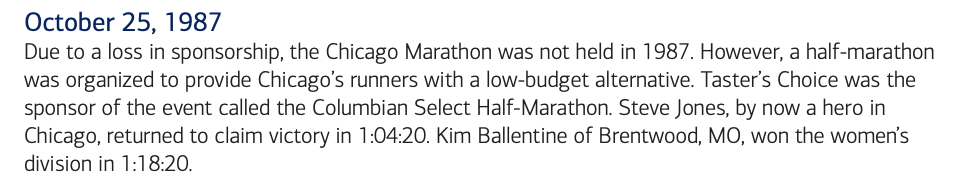



# 2012

In 2012, New York City Marathon was cancelled due to Hurricane Sandy. Therefore it makes sense there are 10 winners 

# 2014

2014 is an interesting year because there are 13 winners. 

Let's take a quick look before we move on to charts and graphs.

In [ ]:
df[df['year'] == 2014]

In 2014 Boston Marathon have 3 winners, and from a quick Google research, I found Rita Jeptoo was disqualified for doping. 
We are going to go ahead and delete Rita Jeptoo's row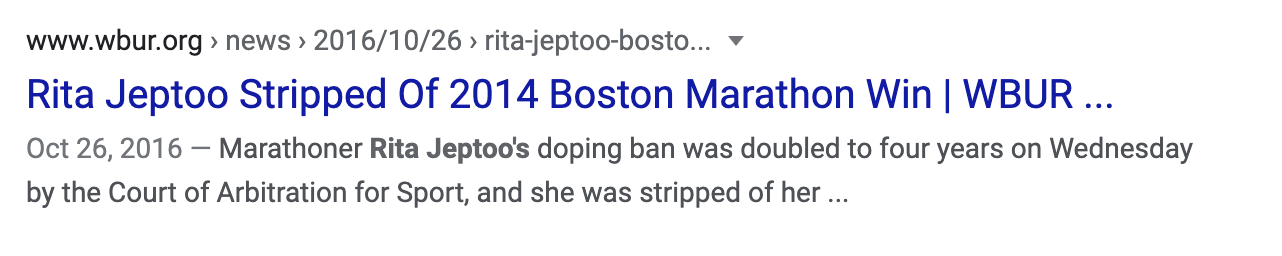

In [ ]:
df.drop(df[(df['winner'] == 'Rita Jeptoo') & (df['year'] == 2014)].index, inplace=True)
df[df['winner'] == 'Rita Jeptoo']

Lastly, since 2018 data is incomplete, we are going to drop 2018 rows. 

In [ ]:
df.drop(df[df['year'] == 2018].index, inplace=True)

In [ ]:
df.year.max()

In [ ]:
df.info

# LETS DO SOME VISUALIZATIONS

In [ ]:
x = df['country'].value_counts()
x = pd.DataFrame(x).reset_index()
x.columns = ['country', 'winners freq']
x.set_index('country')
x.sort_values('country')
x


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="winners freq", y="country", data=x)
ax.set_title('COUNTRIES WITH THE MOST WINS')
plt.show()

# WHO ARE THE GOATs?

In [ ]:
goat = df.value_counts('winner')[:10] 
goat = pd.DataFrame(goat).reset_index()
goat.columns = ['Name', 'Winners Frequencies']

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x="Name", y="Winners Frequencies", data=goat)
ax.set_title("MARATHON GOAT's", pad=20, fontdict={'fontsize':24})
plt.show()

# NOT ALL 26.2 MILES ARE THE SAME

Running 26.2 Miles are not the same everywhere. Let me explain: a Marathon runner would finish a Marathon much slower in a city where there are many hills. Let's find out if the winners'time have improved  

In [ ]:
#pd.to_timedelta(df['time'])

In [ ]:
male_won = df[df['gender'] == 'Male']
male_won.set_index('year')

In [ ]:
px.scatter(data_frame=male_won.sort_values('time'), y='time', x='year', color='marathon', hover_data=['winner'],title="Male Winners Time")

In [ ]:
female_won = df[df['gender'] == 'Female'].reset_index(drop=True)
female_won.set_index(['year'])
px.scatter(data_frame=female_won, y='time', x='year', color='marathon', hover_data=['winner'], title="Female Winners Time")

Looks like Marathon runners' running time has been consistently decreasing since the first event started. 